**Dataset 1**

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f"File {filename} uploaded successfully!")
    print(df.head())

Saving movie_review_with_sentiment.csv to movie_review_with_sentiment (4).csv
File movie_review_with_sentiment (4).csv uploaded successfully!
              movie_name                                   one_movie_review  \
0              The Gorge  FULL SPOILER-FREE REVIEW @ https://talkingfilm...   
1  Mufasa: The Lion King  Rubbish poster aside, <em>'Mufasa: The Lion Ki...   
2            Flight Risk  <em>'Flight Risk'</em> is a film that I'm not ...   
3                Moana 2  When "Moana" learns that the whole of Pacific ...   
4   Sonic the Hedgehog 3  So for fifty years, "GUN" have kept "Shadow" i...   

  sentiment  
0  Positive  
1  Positive  
2  Positive  
3  Positive  
4  Positive  


In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,2276
Negative,481
Neutral,415


**Dataset 2**

In [ ]:

uploaded = files.upload()
for filename in uploaded.keys():
    df1 = pd.read_csv(filename)
    print(f"File {filename} uploaded successfully!")
    print(df1.head())

Saving dataframe.csv to dataframe (2).csv
File dataframe (2).csv uploaded successfully!
                         movie_name  \
0                           Cleaner   
1  Captain America: Brave New World   
2                     A Working Man   
3                         Mickey 17   
4                           Moana 2   

                                    one_movie_review sentiment  
0  full spoilerfree review cleaner is a functiona...  Positive  
1  captain america brave new world came close to ...  Positive  
2  full spoilerfree review a working man is a tex...  Negative  
3  full spoilerfree review mickey presents an int...  Positive  
4  when moana learns that the whole of pacific is...  Positive  


In [ ]:
df1['sentiment'].value_counts()

,count
sentiment,
Positive,3821
Negative,1093
Neutral,82


**Dataset 3**

In [ ]:

uploaded = files.upload()
for filename in uploaded.keys():
    df2 = pd.read_csv(filename)
    print(f"File {filename} uploaded successfully!")
    print(df2.head())

Saving movie_reviews_neutral.csv to movie_reviews_neutral (2).csv
File movie_reviews_neutral (2).csv uploaded successfully!
                movie_name                                   one_movie_review  \
0     Deadpool & Wolverine  Theres not much of a plot and the villains wer...   
1          Despicable Me 4  It's trash. Don't see it. \r\n\r\n**Full revie...   
2                Gladiator  An epic old movie, an absolute must watch. Eve...   
3  Five Nights at Freddy's                      Good for scaring little kids.   
4              Oppenheimer  Cillian Murphy, so hot right now. Film is a li...   

  sentiment  
0   Neutral  
1   Neutral  
2   Neutral  
3   Neutral  
4   Neutral  


In [ ]:
df2['sentiment'].value_counts()

,count
sentiment,
Neutral,58


**Adding all the datasets**

In [ ]:
df3 = pd.concat([df, df1, df2], ignore_index=True)

In [ ]:
df3['sentiment'].value_counts()

,count
sentiment,
Positive,6097
Negative,1574
Neutral,555


**Removing Duplicates**

In [ ]:
deduplicated_df = (
    df3.groupby('movie_name', group_keys=False)
    .apply(lambda group: group.drop_duplicates(
        subset=['one_movie_review'],
        keep='first'
    ))
    .reset_index(drop=True)
)

<ipython-input-52-e35d9a574b29>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.drop_duplicates(


In [ ]:
deduplicated_df['sentiment'].value_counts()

,count
sentiment,
Positive,5803
Negative,1514
Neutral,502


In [ ]:
deduplicated_df.head()

,movie_name,one_movie_review,sentiment
0,#Alive,is a gripping and intense south korean zombie ...,Negative
1,'71,though neither he nor sean harris should ever ...,Negative
2,(500) Days of Summer,Fun film.\r\n\r\n<em>'(500) Days of Summer'</e...,Positive
3,(500) Days of Summer,fun film days of summer impressed me it featur...,Positive
4,02:22,leaning hard on the number two in the title se...,Negative


**Uploading the Data file**

In [ ]:
uploaded = files.upload()
for filename in uploaded.keys():
    df4 = pd.read_csv(filename)
    print(f"File {filename} uploaded successfully!")
    print(df4.head())

Saving movie_reviews_600_neutral_600_negative.csv to movie_reviews_600_neutral_600_negative (3).csv
File movie_reviews_600_neutral_600_negative (3).csv uploaded successfully!
                         movie_name  \
0                           Cleaner   
1  Captain America: Brave New World   
2                     A Working Man   
3                     A Working Man   
4                       Flight Risk   

                                    one_movie_review sentiment  
0  "Cleaner" ticks the basics boxes for an action...  Negative  
1  While I find it the same general quality of a ...  Negative  
2  FULL SPOILER-FREE REVIEW @ https://fandomwire....  Negative  
3  FULL SPOILER-FREE REVIEW @ https://fandomwire....  Negative  
4  Flight Risk crashes and burns in spectacular f...  Negative  


In [ ]:
df5 = pd.concat([df3, df4], ignore_index=True)

In [ ]:
df5['sentiment'].value_counts()

,count
sentiment,
Positive,6097
Negative,2174
Neutral,644


**Keeping the first occurance of Data**

In [ ]:

deduplicated_df = (
    df5.groupby('movie_name', group_keys=False)
    .apply(lambda group: group.drop_duplicates(
        subset=['one_movie_review'],
        keep='first'
    ))
    .reset_index(drop=True)
)

<ipython-input-65-09da7961c566>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda group: group.drop_duplicates(


In [ ]:
deduplicated_df['sentiment'].value_counts()

,count
sentiment,
Positive,5803
Negative,1974
Neutral,546


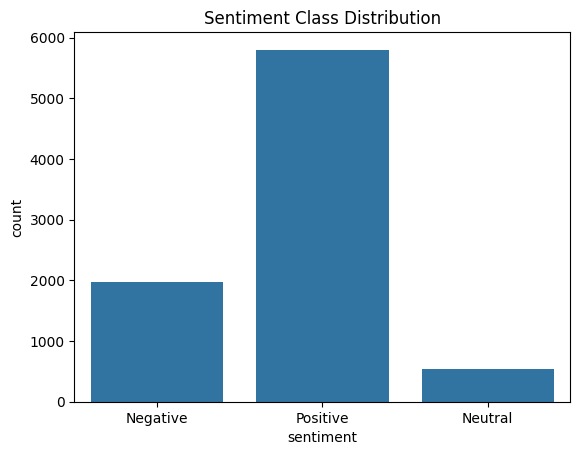

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=deduplicated_df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

**Choosing a more balanced dataset for prediction**

In [ ]:
import pandas as pd

Positive = df5[df5['sentiment'] == 'Positive'].sample(n=1200, random_state=42) if len(df5[df5['sentiment'] == 'Positive']) >= 1200 else df5[df5['sentiment'] == 'Positive']
Negative = df5[df5['sentiment'] == 'Negative'].sample(n=1200, random_state=42) if len(df5[df5['sentiment'] == 'Negative']) >= 1200 else df5[df5['sentiment'] == 'Negative']
Neutral = df5[df5['sentiment'] == 'Neutral'].sample(n=546, random_state=42) if len(df5[df5['sentiment'] == 'Neutral']) >= 546 else df5[df5['sentiment'] == 'Neutral']

balanced_df = pd.concat([Positive, Negative, Neutral]).sample(frac=1, random_state=42).reset_index(drop=True)

print("Final Counts:")
print(f"Positive: {len(balanced_df[balanced_df['sentiment'] == 'Positive'])}")
print(f"Negative: {len(balanced_df[balanced_df['sentiment'] == 'Negative'])}")
print(f"Neutral: {len(balanced_df[balanced_df['sentiment'] == 'Neutral'])}")

balanced_df.to_csv('balanced_reviews.csv', index=False)
print("\nSaved to 'balanced_reviews.csv'")

Final Counts:
Positive: 1200
Negative: 1200
Neutral: 546

Saved to 'balanced_reviews.csv'


**Class Distribution**

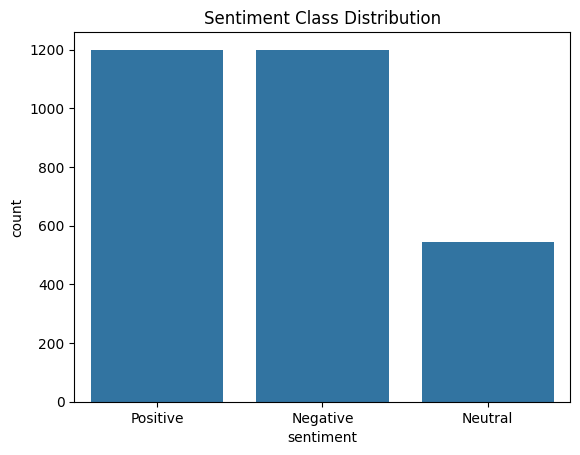

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=balanced_df, x='sentiment')
plt.title("Sentiment Class Distribution")
plt.show()

**Downloaded the final curated dataset**

In [ ]:
df5.to_csv('finalpedata.csv', index=False)
files.download('finalpedata.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install pandas scikit-learn

**Preproceesed the data trained and evauated models for SVM,Logistic Regression,Naive Bayes and KNN.Saved the best model with F2 Score (SVM).**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, fbeta_score, classification_report
from sklearn.pipeline import make_pipeline
import joblib
# Models
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


def preprocess_data(df):
    sentiment_map = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
    df['sentiment'] = df['sentiment'].map(sentiment_map).astype(int)

    df = df.dropna(subset=['one_movie_review', 'sentiment'])

    class_counts = df['sentiment'].value_counts()
    if class_counts.nunique() > 1:
        from sklearn.utils import resample
        classes = df['sentiment'].unique()
        dfs = []
        max_samples = max(class_counts)
        for c in classes:
            temp_df = df[df.sentiment == c]
            if len(temp_df) < max_samples:
                dfs.append(resample(temp_df,
                                replace=True,
                                n_samples=max_samples,
                                random_state=42))
            else:
                dfs.append(temp_df.sample(max_samples, random_state=42))
        df = pd.concat(dfs)

    return df

df5 = preprocess_data(df5)

X = df5['one_movie_review']
y = df5['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def get_models():
    vectorizer = TfidfVectorizer(
        stop_words='english',
        max_features=5000,
        ngram_range=(1, 2)
    )

    models = {
        "SVM": make_pipeline(vectorizer, SVC(kernel='linear', probability=True, class_weight='balanced')),
        "Naive Bayes": make_pipeline(vectorizer, MultinomialNB()),
        "Logistic Regression": make_pipeline(vectorizer, LogisticRegression(max_iter=1000, class_weight='balanced')),
        "KNN": make_pipeline(vectorizer, KNeighborsClassifier(n_neighbors=5))
    }
    return models

def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    f2 = fbeta_score(y_test, y_pred, average='weighted', beta=2)

    print("Detailed Classification Report:")
    print(classification_report(y_test, y_pred,
                              target_names=['negative', 'neutral', 'positive'],
                              digits=4))

    return accuracy, f2

print("Starting model training...")
models = get_models()
results = []
best_score = -1
best_model = None

for name, model in models.items():
    print(f"\n{'='*40}")
    print(f"Training {name}...")
    model.fit(X_train, y_train)

    print(f"Evaluating {name}...")
    accuracy, f2 = evaluate_model(model, X_test, y_test)
    results.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'F2 Score': round(f2, 4)
    })

    if f2 > best_score:
        best_score = f2
        best_model = model
        best_model_name = name
        print(f"New best model: {name} (F2: {f2:.4f})")

results_df = pd.DataFrame(results).sort_values('F2 Score', ascending=False)
print("\nFinal Model Comparison:")
print(results_df)

joblib.dump(best_model, 'best_sentiment_model.pkl')
print(f"\nSaved best model ({best_model_name}) to 'best_sentiment_model.pkl'")


Starting model training...

Training SVM...
Evaluating SVM...
Detailed Classification Report:
              precision    recall  f1-score   support

    negative     0.9051    0.9138    0.9095      1253
     neutral     0.8885    0.9710    0.9279      1206
    positive     0.9656    0.8658    0.9130      1200

    accuracy                         0.9169      3659
   macro avg     0.9197    0.9169    0.9168      3659
weighted avg     0.9195    0.9169    0.9167      3659

New best model: SVM (F2: 0.9165)

Training Naive Bayes...
Evaluating Naive Bayes...
Detailed Classification Report:
              precision    recall  f1-score   support

    negative     0.7931    0.7526    0.7723      1253
     neutral     0.8077    0.7695    0.7881      1206
    positive     0.7509    0.8267    0.7870      1200

    accuracy                         0.7825      3659
   macro avg     0.7839    0.7829    0.7825      3659
weighted avg     0.7841    0.7825    0.7823      3659


Training Logistic Regressio

**Further integrated Streamlit to let users predict sentiment using the model.Implemented ExplainableAI to let users see the impact of words used in the final determination of sentiment of the reviews.Uploaded the **